# Binary logistic regression

In [25]:
import numpy as np
import pandas
import pandas as pd
import matplotlib.pyplot as plt

import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

### Ex. 0.

In [26]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Exam 1    100 non-null    float64
 1   Exam 2    100 non-null    float64
 2   Admitted  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [28]:
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Ex. 1.

In [29]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

theta = np.zeros((X.shape[0]+1, 1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])

In [30]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

### Ex. 2.

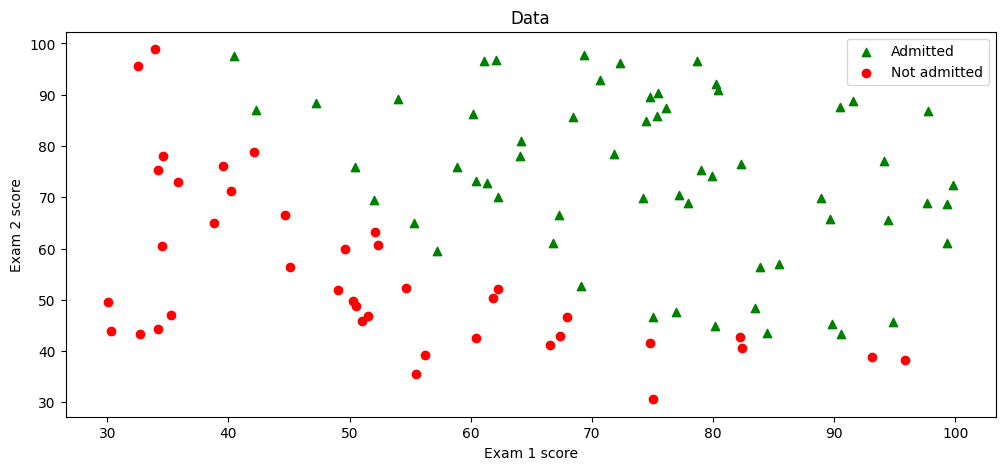

In [31]:
plt.figure(figsize=(12, 5))
plt.scatter(data['Exam 1'].where(data.Admitted==1), data['Exam 2'].where(data.Admitted==1), marker='^', c='g', label='Admitted')
plt.scatter(data['Exam 1'].where(data.Admitted==0), data['Exam 2'].where(data.Admitted==0), marker='o', c='r', label='Not admitted')
plt.legend()
plt.title('Data')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

### Ex. 3.

In [32]:
def sig(t):
    return 1 / (1 + np.exp(-t))

### Ex. 4.

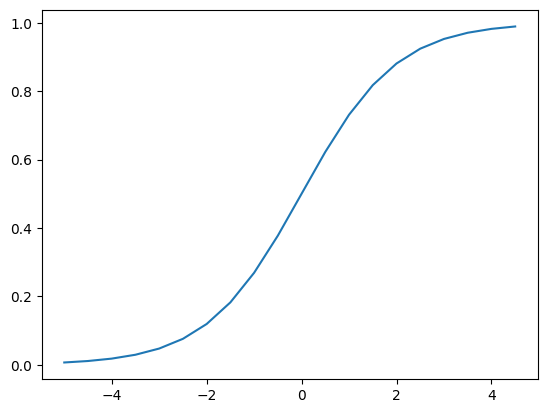

In [33]:
sig_x = np.arange(-5, 5, 0.5)
sig_y = sig(sig_x)
plt.plot(sig_x, sig_y)
plt.show()

### Ex. 5.

In [34]:
def computeCost(X, y, theta):
    c = -y * np.log(sig(theta.T @ X)) - (1-y) * np.log(1-sig(theta.T @ X))
    return c.sum() / X.shape[1]

In [35]:
computeCost(X, y, theta)

0.6931471805599453

### Ex. 6

In [36]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    cost = []
    for i in range(it):
        h = sig(theta.T @ X)
        h_y = h - y
        h_yxX = h_y @ X.T
        theta = theta - alpha * h_yxX.T / X.shape[1]

        cost.append(computeCost(X, y, theta))

    return theta, cost

In [37]:
alpha = 1
it = 150

opt_theta, costs = simple_gradient(X, y, theta, alpha, it)
print('optimal theta:', opt_theta)
print('optimal function cost:', costs[-1])

optimal theta: [[1.41957362]
 [3.35941597]
 [3.11271333]]
optimal function cost: 0.2064071430444978


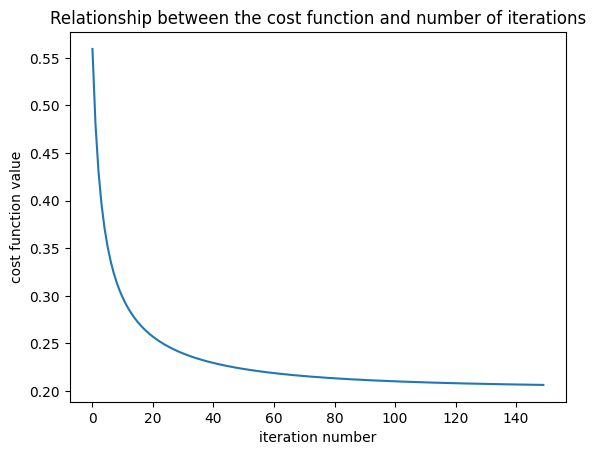

In [38]:
plt.plot(costs)
plt.title('Relationship between the cost function and number of iterations')
plt.ylabel('cost function value')
plt.xlabel('iteration number')
plt.show()

### Ex. 7.

In [39]:
y_pred = (sig(opt_theta.T @ X) > 0.5).astype('float64')

print('Accuracy of predictions:', np.sum(y == y_pred) / y.shape[1])

Accuracy of predictions: 0.89


### Ex. 8.

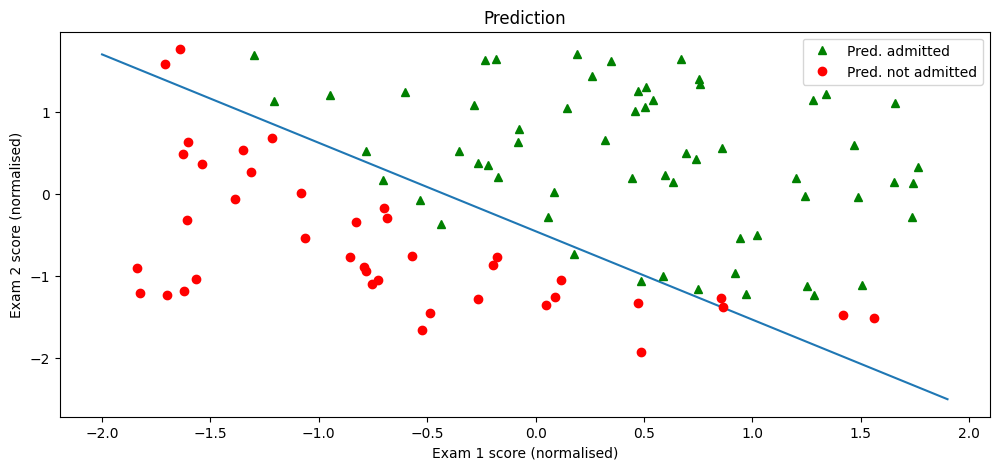

In [40]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -opt_theta[0, 0] / opt_theta[2, 0] - opt_theta[1, 0] / opt_theta[2, 0] * x1
plt.figure(figsize=(12, 5))
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, '^', c='g', label='Pred. admitted')
plt.plot(X1_0, X2_0, 'o', c='r', label='Pred. not admitted')
plt.legend()
plt.title('Prediction')
plt.xlabel('Exam 1 score (normalised)')
plt.ylabel('Exam 2 score (normalised)')
plt.show()

# Logistic regression - Python

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

### Ex. 1.

In [42]:
logreg = LogisticRegression(penalty='none', solver='newton-cg').fit(X, Y)

### Ex. 2.

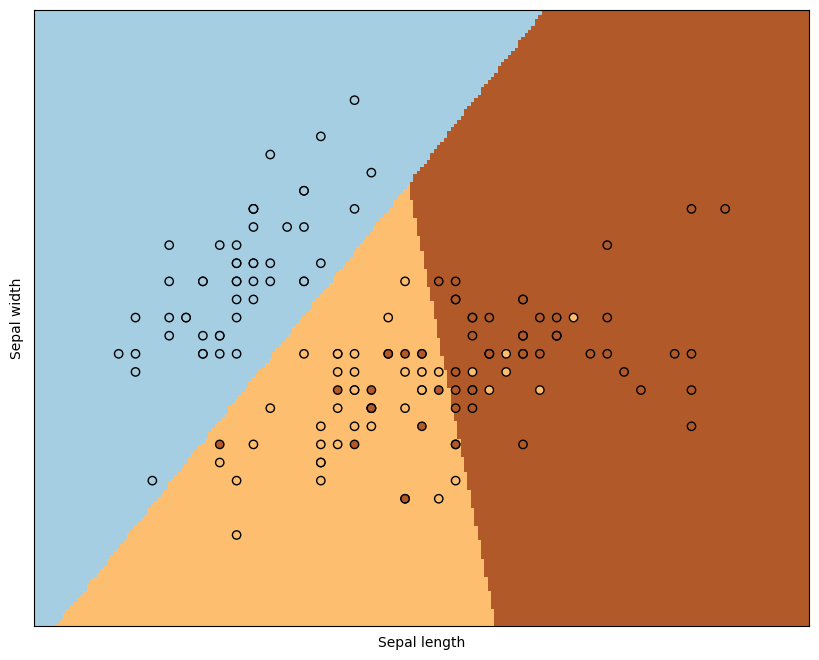

In [43]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
plt.figure(figsize=(10, 8))
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Ex. 3.

In [44]:
logreg.predict_proba(X)

array([[1.00000000e+000, 2.12309511e-020, 3.08901403e-021],
       [1.00000000e+000, 3.84915021e-012, 3.12684539e-013],
       [1.00000000e+000, 1.64011449e-025, 9.87474230e-027],
       [1.00000000e+000, 5.12047870e-026, 2.44776053e-027],
       [1.00000000e+000, 4.38252198e-027, 5.48945921e-028],
       [1.00000000e+000, 5.67308625e-022, 1.71721104e-022],
       [1.00000000e+000, 2.75288423e-035, 1.48582860e-036],
       [1.00000000e+000, 6.62835632e-021, 7.65707742e-022],
       [1.00000000e+000, 4.99095160e-027, 1.50402564e-028],
       [1.00000000e+000, 3.12985334e-015, 2.64752257e-016],
       [1.00000000e+000, 8.58027347e-016, 2.39528475e-016],
       [1.00000000e+000, 4.27166216e-028, 3.37299639e-029],
       [1.00000000e+000, 9.77148084e-016, 6.56270416e-017],
       [1.00000000e+000, 1.03023906e-033, 2.67279052e-035],
       [1.00000000e+000, 1.11069908e-010, 7.49292282e-011],
       [1.00000000e+000, 1.23261784e-026, 8.08277942e-027],
       [1.00000000e+000, 5.67308625e-022

### Ex. 4.

In [45]:
y_pred = logreg.predict(X)

pd.DataFrame(Y, y_pred)
print('Mean Accuracy', logreg.score(X, Y))

Mean Accuracy 0.8333333333333334


In [46]:
from sklearn.metrics import classification_report

print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.75      0.76      0.75        50
           2       0.76      0.74      0.75        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150



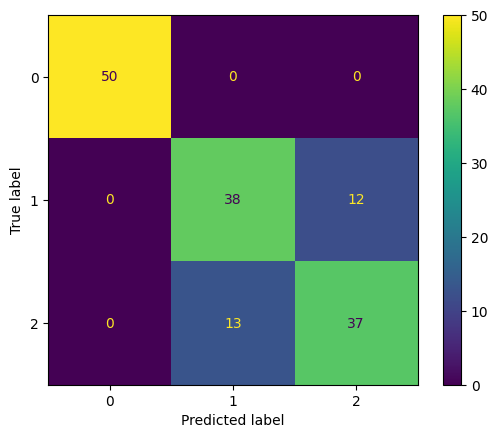

In [47]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mat = confusion_matrix(Y, y_pred)

disp = ConfusionMatrixDisplay(mat)
disp.plot()
plt.show()